### Exercício 3

Acesse o portal World Bank Open Data e selecione um conjunto de indicadores para um país ou região específicos. Escolha uma categoria temática única (ex: energia, saúde, educação, economia, agricultura) — não pode ser repetida entre os colegas.

Você deverá baixar ao menos três indicadores diferentes relacionados à sua categoria e analisá-los ao longo dos últimos 30 anos (quando disponíveis).

Importe e organize os dados com pandas ou outra ferramenta que considerar importante, garantindo limpeza e padronização.

- a) Um gráfico de linha temporal com os três indicadores

- b) Um gráfico de dispersão com regressão ou tendência

- c) Um heatmap da variação por década (agrupando os dados)

- d) Um gráfico de barras ou área, comparando os três indicadores em um mesmo ano-chave (escolhido por você)

Produza quatro visualizações diferentes, sendo:

 

Realize uma análise crítica (300 palavras mín.): Que tendências são visíveis? Há correlações? Há algum dado surpreendente ou preocupante?

a)

![fluxo_a](ATV3_ex3_a.png)

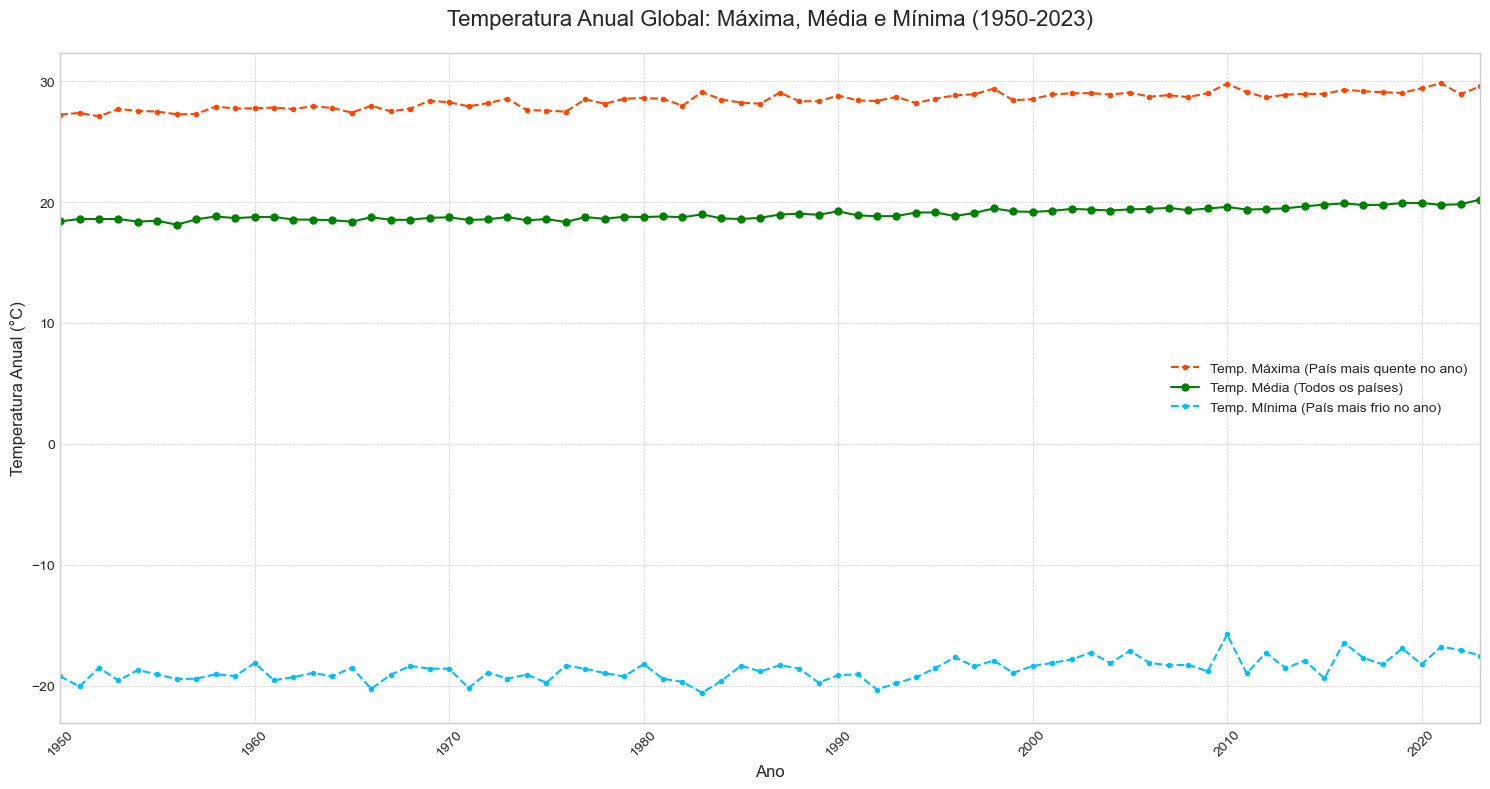

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
# O seu arquivo original tem os anos como colunas, um formato conhecido como "wide".
df = pd.read_csv('saida_temperaturas.csv')

# Vamos transformar (unpivot) a tabela para o formato "long",
# onde teremos uma coluna para 'Ano' e outra para 'Temperatura'.
df_melted = df.melt(id_vars=['País'], var_name='Ano', value_name='Temperatura')

# Garantir que a coluna 'Ano' seja do tipo numérico para ordenação e agrupamento
df_melted['Ano'] = pd.to_numeric(df_melted['Ano'], errors='coerce')
df_melted.dropna(subset=['Ano'], inplace=True)
df_melted['Ano'] = df_melted['Ano'].astype(int)

# Para cada ano, calculamos a temperatura máxima, mínima e média entre todos os países.
yearly_stats = df_melted.groupby('Ano')['Temperatura'].agg(['max', 'min', 'mean'])

# Renomeamos as colunas para que a legenda do gráfico fique clara
yearly_stats.rename(columns={
    'max': 'Máxima (país mais quente)',
    'min': 'Mínima (país mais frio)',
    'mean': 'Média Global'
}, inplace=True)

# --- Geração do Gráfico ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 8))

# Plotar as três linhas de dados
plt.plot(yearly_stats.index, yearly_stats['Máxima (país mais quente)'], marker='.', linestyle='--', color='orangered', label='Temp. Máxima (País mais quente no ano)')
plt.plot(yearly_stats.index, yearly_stats['Média Global'], marker='o', linestyle='-', markersize=5, color='green', label='Temp. Média (Todos os países)')
plt.plot(yearly_stats.index, yearly_stats['Mínima (país mais frio)'], marker='.', linestyle='--', color='deepskyblue', label='Temp. Mínima (País mais frio no ano)')

# Configurar os títulos, rótulos e legenda
plt.title('Temperatura Anual Global: Máxima, Média e Mínima (1950-2023)', fontsize=16, pad=20)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Temperatura Anual (°C)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(yearly_stats.index.min(), yearly_stats.index.max())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Salvar a imagem do gráfico em um arquivo
#plt.savefig('temperaturas_globais_anuais.png')

#print("Gráfico salvo com sucesso como 'temperaturas_globais_anuais.png'")

b)

![fluxo_b](ATV3_ex3_b.png)

O gráfico de dispersão com regressão foi salvo como 'dispersao_com_regressao_global.png'


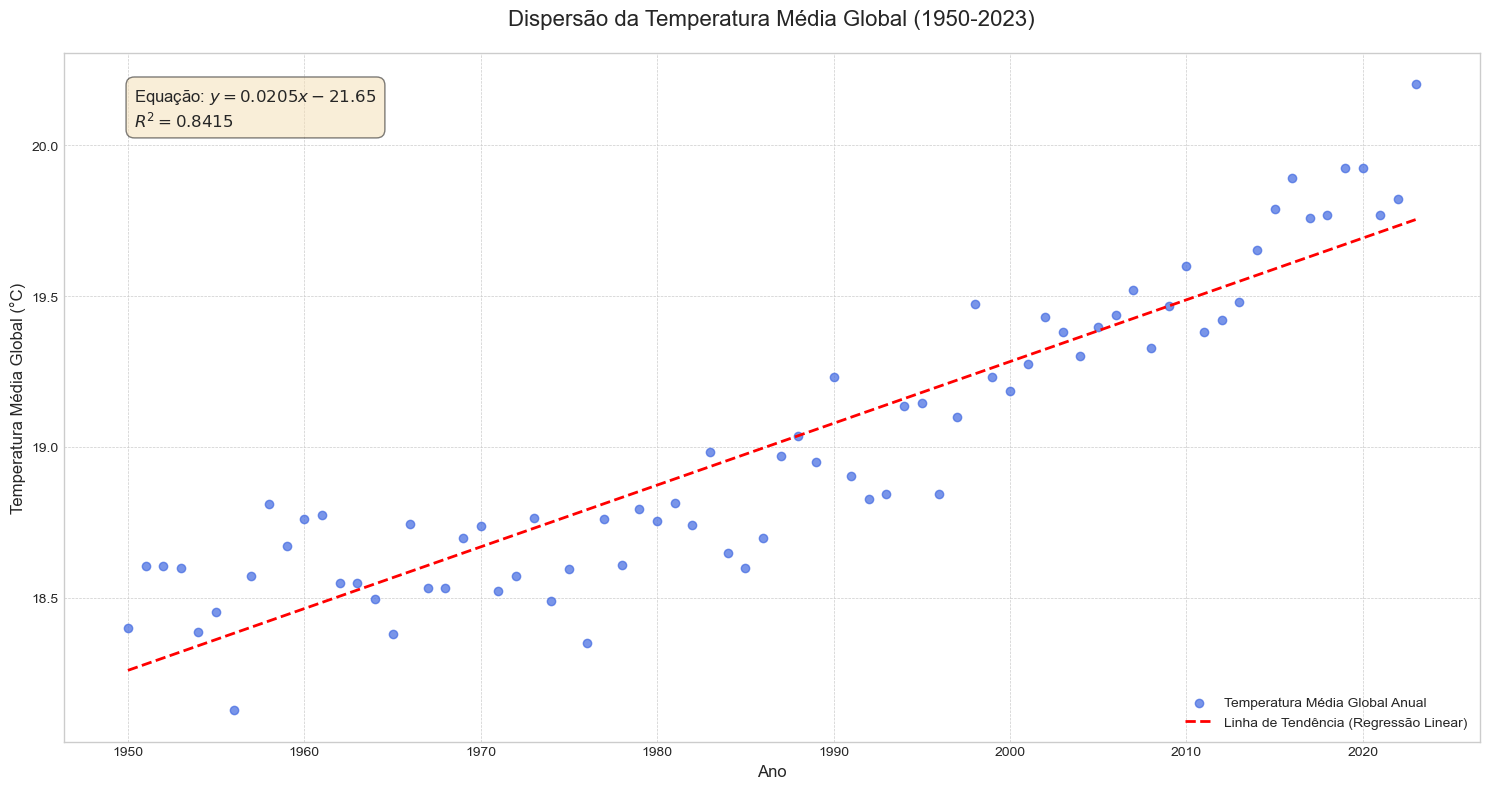

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 1. Carregar os dados do arquivo CSV
df = pd.read_csv('saida_temperaturas.csv')

# 2. Reformatar os dados (de "wide" para "long")
# O arquivo original tem anos como colunas. "melt" transforma isso em duas colunas: 'Ano' e 'Temperatura'.
df_melted = df.melt(id_vars=['País'], var_name='Ano', value_name='Temperatura')

# 3. Limpeza e preparação dos dados
# Converte a coluna 'Ano' para um tipo numérico para permitir cálculos.
df_melted['Ano'] = pd.to_numeric(df_melted['Ano'], errors='coerce')
df_melted.dropna(subset=['Ano'], inplace=True)
df_melted['Ano'] = df_melted['Ano'].astype(int)

# 4. Calcular a temperatura média global para cada ano
# Agrupa todas as temperaturas por ano e calcula a média.
yearly_mean_temp = df_melted.groupby('Ano')['Temperatura'].mean()

# 5. Executar a Regressão Linear
# Extrai os valores de 'x' (Anos) e 'y' (Temperaturas médias) para o cálculo.
x = yearly_mean_temp.index
y = yearly_mean_temp.values

# A função linregress da biblioteca SciPy calcula tudo o que precisamos:
# slope: inclinação da reta
# intercept: onde a reta cruza o eixo y
# r_value: coeficiente de correlação (usado para calcular o R²)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Calcula o valor R-quadrado (mede o quão bem a linha se ajusta aos dados)
r_squared = r_value**2

# Cria os pontos da linha de tendência usando a equação da reta (y = mx + c)
line = slope * x + intercept

# 6. Gerar o Gráfico
# Define o estilo e o tamanho da figura.
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 8))

# Plota os dados reais como um gráfico de dispersão (pontos).
plt.scatter(x, y, label='Temperatura Média Global Anual', color='royalblue', alpha=0.7)

# Plota a linha de tendência calculada.
plt.plot(x, line, color='red', linestyle='--', linewidth=2, label='Linha de Tendência (Regressão Linear)')

# 7. Adicionar Títulos, Rótulos e Legendas
plt.title('Dispersão da Temperatura Média Global (1950-2023)', fontsize=16, pad=20)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Temperatura Média Global (°C)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# 8. Anotar o Gráfico com os Resultados da Regressão
# Cria o texto da anotação com a equação da reta e o R².
# A notação com '$' permite formatar o texto como uma fórmula matemática.
annotation_text = f'Equação: $y = {slope:.4f}x {intercept:+.2f}$\n$R^2 = {r_squared:.4f}$'
plt.annotate(annotation_text, xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

# Ajusta o layout para garantir que todos os elementos do gráfico fiquem visíveis.
plt.tight_layout()

# 9. Salvar o Gráfico
# Salva a imagem final em um arquivo PNG.
plt.savefig('dispersao_com_regressao_global.png')

print("O gráfico de dispersão com regressão foi salvo como 'dispersao_com_regressao_global.png'")

c)

![fluxo_c](ATV3_ex3_c.png)

O gráfico de heatmap foi salvo como 'heatmap_temperatura_decadas.png'


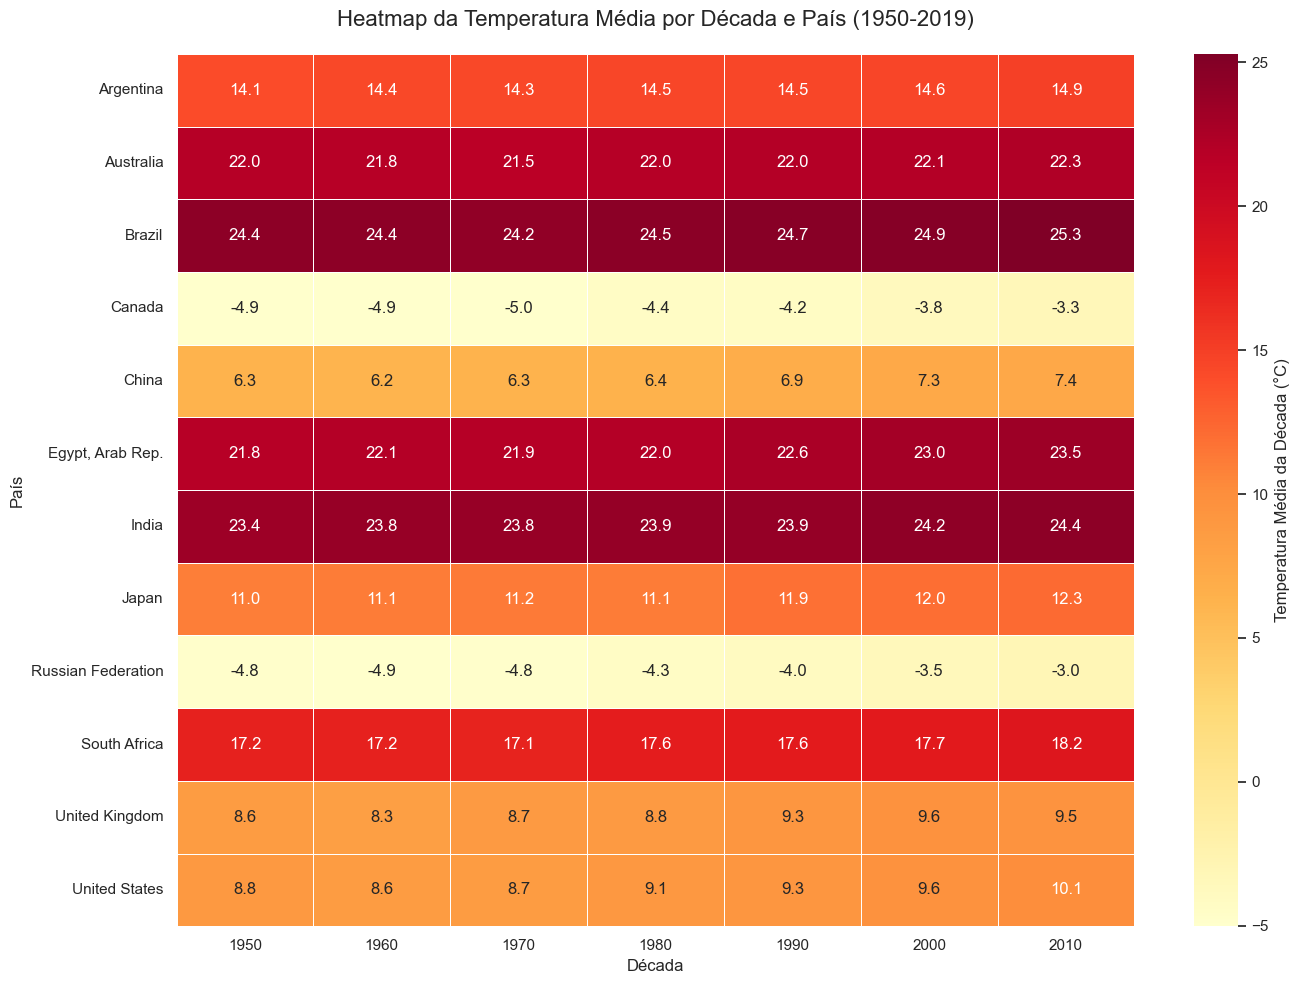

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carregar e remodelar os dados
df = pd.read_csv('saida_temperaturas.csv')
df_melted = df.melt(id_vars=['País'], var_name='Ano', value_name='Temperatura')

# 2. Converter 'Ano' para numérico e criar a coluna 'Decada'
df_melted['Ano'] = pd.to_numeric(df_melted['Ano'], errors='coerce')
df_melted.dropna(subset=['Ano'], inplace=True)
df_melted['Ano'] = df_melted['Ano'].astype(int)
df_melted['Decada'] = (df_melted['Ano'] // 10) * 10

# 3. Filtrar para a lista de países selecionados
# Esta lista foi verificada para garantir que os nomes estão corretos conforme o arquivo
lista_paises = [
    'Brazil', 'United States', 'China', 'India', 'Russian Federation',
    'Australia', 'Egypt, Arab Rep.', 'South Africa', 'Argentina', 'Canada',
    'United Kingdom', 'Japan'
]
df_filtrado = df_melted[df_melted['País'].isin(lista_paises)]

# 4. Calcular a temperatura média por país e década
df_decadas = df_filtrado.groupby(['País', 'Decada'])['Temperatura'].mean().reset_index()

# 5. Pivotar a tabela para o formato de matriz, ideal para um heatmap
# O index se torna as linhas, as colunas são as décadas, e os valores são as temperaturas.
heatmap_data = df_decadas.pivot(index='País', columns='Decada', values='Temperatura')

# A década de 2020 está incompleta, então a removemos para uma comparação justa.
heatmap_data = heatmap_data.drop(columns=[2020])

# 6. Gerar o Heatmap
# Define o tamanho do gráfico para melhor visualização
plt.figure(figsize=(14, 10))
# Define a escala da fonte para os textos no gráfico
sns.set(font_scale=1)

# A função heatmap da biblioteca Seaborn cria o gráfico
heatmap = sns.heatmap(
    heatmap_data,
    annot=True,          # Escreve o valor da temperatura em cada célula
    fmt=".1f",           # Formata o número para ter apenas uma casa decimal
    linewidths=.5,       # Adiciona uma pequena linha entre as células
    cmap='YlOrRd',       # Define o mapa de cores (Amarelo-Laranja-Vermelho)
    cbar_kws={'label': 'Temperatura Média da Década (°C)'} # Etiqueta da barra de cores
)

# 7. Adicionar títulos e ajustar o layout
plt.title('Heatmap da Temperatura Média por Década e País (1950-2019)', fontsize=16, pad=20)
plt.xlabel('Década', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.xticks(rotation=0) # Mantém os rótulos das décadas na horizontal
plt.yticks(rotation=0) # Mantém os nomes dos países na horizontal

# Ajusta o layout para evitar que os elementos se sobreponham
plt.tight_layout()

# 8. Salvar o gráfico
plt.savefig('heatmap_temperatura_decadas.png')

print("O gráfico de heatmap foi salvo como 'heatmap_temperatura_decadas.png'")

d)

![fluxo_a](ATV3_ex3_a.png)

O gráfico de barras corrigido foi salvo como 'comparativo_indicadores_2023_corrigido.png'


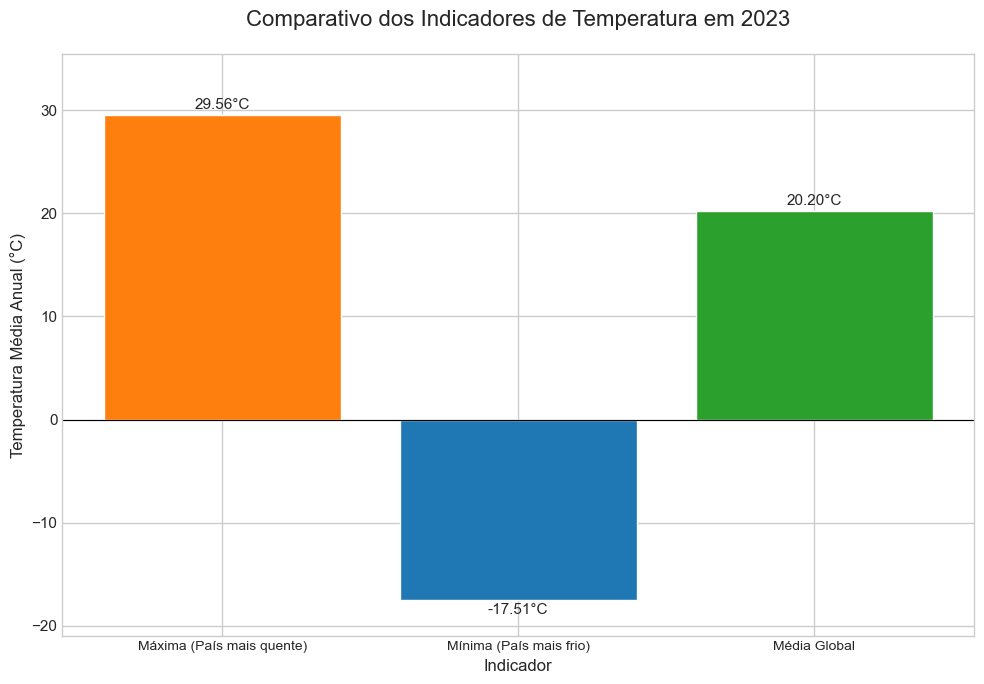

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar e remodelar os dados do arquivo CSV
df = pd.read_csv('saida_temperaturas.csv')
df_melted = df.melt(id_vars=['País'], var_name='Ano', value_name='Temperatura')

# Converter a coluna 'Ano' para o tipo numérico
df_melted['Ano'] = pd.to_numeric(df_melted['Ano'], errors='coerce')
df_melted.dropna(subset=['Ano'], inplace=True)
df_melted['Ano'] = df_melted['Ano'].astype(int)

# 2. Calcular as estatísticas anuais globais
# Para cada ano, calculamos a temp. máxima, mínima e média entre todos os países.
yearly_stats = df_melted.groupby('Ano')['Temperatura'].agg(['max', 'min', 'mean'])

# 3. Definir o ano-chave e extrair os dados correspondentes
ano_chave = 2023
dados_ano_chave = yearly_stats.loc[ano_chave]

# Renomear os indicadores para ficarem mais claros no gráfico
dados_ano_chave = dados_ano_chave.rename({
    'max': 'Máxima (País mais quente)',
    'min': 'Mínima (País mais frio)',
    'mean': 'Média Global'
})

# 4. Gerar o Gráfico de Barras
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# Criar as barras com cores distintas
colors = ['#ff7f0e', '#1f77b4', '#2ca02c'] # Laranja, Azul, Verde
bars = ax.bar(dados_ano_chave.index, dados_ano_chave.values, color=colors)

# Adicionar uma linha preta em y=0 para destacar a divisão positivo/negativo
ax.axhline(0, color='black', linewidth=0.8) # <-- ALTERAÇÃO

# 5. Adicionar anotações e rótulos para clareza
ax.set_title(f'Comparativo dos Indicadores de Temperatura em {ano_chave}', fontsize=16, pad=20)
ax.set_ylabel('Temperatura Média Anual (°C)', fontsize=12)
ax.set_xlabel('Indicador', fontsize=12)

# Colocar o valor exato em cima ou embaixo de cada barra
for bar in bars:
    yval = bar.get_height()
    # Se a barra for negativa, colocar o texto abaixo dela
    if yval < 0:
        va = 'top'
        offset = -0.3
    else: # Se for positiva, colocar acima
        va = 'bottom'
        offset = 0.3
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + offset, f'{yval:.2f}°C',
            ha='center', va=va, fontsize=11)

# Ajustar os limites do eixo Y para dar espaço para o texto no topo das barras
# O limite inferior agora é dinâmico, baseado no valor mínimo
min_val = dados_ano_chave.min()
max_val = dados_ano_chave.max()
ax.set_ylim(min_val * 1.2, max_val * 1.2) # <-- ALTERAÇÃO

plt.xticks(rotation=0, ha='center', fontsize=10)
plt.tight_layout()

# 6. Salvar o gráfico em um arquivo
plt.savefig(f'comparativo_indicadores_{ano_chave}_corrigido.png')

print(f"O gráfico de barras corrigido foi salvo como 'comparativo_indicadores_{ano_chave}_corrigido.png'")

Tendo em vista que o gráfico da temperatura média do mundo nos dá uma reta crescente, observa-se que o fenômeno do aquecimento global é real. Também pode-se observar que as temperaturas máximas e mínimas estão ficando cada vez mais distantes, ou seja, além do aumento da temperatura média a amplitude de temperaturas também vem aumentando. Com isso, pode-se concluir que temperaturas mais extremas estão se tornando mais frequentes. Isso pode ser problemático para a conservação da biodiversidade do planeta, assim como pode gerar problemas de saúde em quem vive em situações mais extremas.